In [1]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [2]:
%time
import pandas as pd
import numpy as np
import ants
import os
from matplotlib import pyplot as plt
from tqdm import tqdm

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


In [3]:
df = pd.read_csv('../Data/ABIDE_df.csv')

In [4]:
rnames = pd.read_csv('../Data/YeoAtlas/roinames.txt',header=None)
rnames = rnames.values
rnames = [rname[0].replace("''",'') for rname in rnames]

In [5]:
rois = ants.image_read('../Data/YeoAtlas/epi_rois.nii.gz')

In [6]:
fntemp = '/mmfs1/data/aglinska/data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_YeoCorr.nii.gz'
fn_mask = '/mmfs1/data/aglinska/data/ABIDE/Derivatives/cpac_nofilt_global/{sub}/ses-1/func/{sub}_ses-1_mask.nii.gz'

In [7]:
ch = np.array([os.path.exists(fntemp.format(sub=sub)) for sub in df['bids_folder'].values])
print(ch.sum())

1068


In [8]:
df2 = df.iloc[ch]
#df2 = df2.iloc[0:250]

In [9]:
sub = df['bids_folder'].values[0]
im = ants.image_read(fntemp.format(sub=sub))
mask = ants.image_read(fn_mask.format(sub=sub))

In [10]:
ims = [ants.image_read(fntemp.format(sub=sub)) for sub in tqdm(df2['bids_folder'].values)]

100%|██████████| 1068/1068 [04:07<00:00,  4.31it/s]


In [11]:
# Massive hack to bypass RAM bottleneck
n = len(ims)
im_avg = ims[0].numpy()
for i in tqdm(range(1,n)):
    #im_avg = np.array([im_avg,ims[i].numpy()]).sum(axis=0)
    im_avg = np.nansum(np.array([im_avg,ims[i].numpy()]),axis=0)
im_avg = im_avg/n
#im_avg = im.new_image_like(im_avg)
im_avg = im.new_image_like(im_avg)

100%|██████████| 1067/1067 [03:04<00:00,  5.80it/s]


In [26]:
im_avg.to_filename('../Misc/im_avg.nii')

In [30]:
%%time
ims_arr = np.array([im.numpy() for im in ims])

CPU times: user 1min 11s, sys: 34.3 s, total: 1min 46s
Wall time: 1min 46s


In [31]:
ims_arr.shape

(1068, 61, 73, 61, 51)

In [34]:
# %%time
# np.savez_compressed('../Data/fc_data_4D_1068', data=ims_arr)
# ## 12GBS

In [50]:
subs = df2['bids_folder'].values

In [51]:

for i in tqdm(range(len(subs))):
    np.savez_compressed(f'../Data/fc_data/{subs[i]}', data=ims_arr[i,:,:,:])

100%|██████████| 1068/1068 [13:08<00:00,  1.35it/s]


In [14]:
# rr = range(51)
# rr = np.argsort(im_avg.numpy().mean(axis=0).mean(axis=0).mean(axis=0))
# for r in rr:
#     implot = ants.slice_image(im_avg,axis=3,idx=r)
#     implot[np.isnan(implot.numpy())]=0
#     implot.plot_ortho(flat=True,cmap='hot',xyz_lines=False,orient_labels=False,title=rnames[r])

In [15]:
import scipy

In [16]:
map_c = np.corrcoef(np.array([im_avg.numpy()[:,:,:,r].flatten() for r in range(51)]))
Z = scipy.cluster.hierarchy.linkage(1-map_c,method='ward')

<ipython-input-16-48a48d192b05>:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



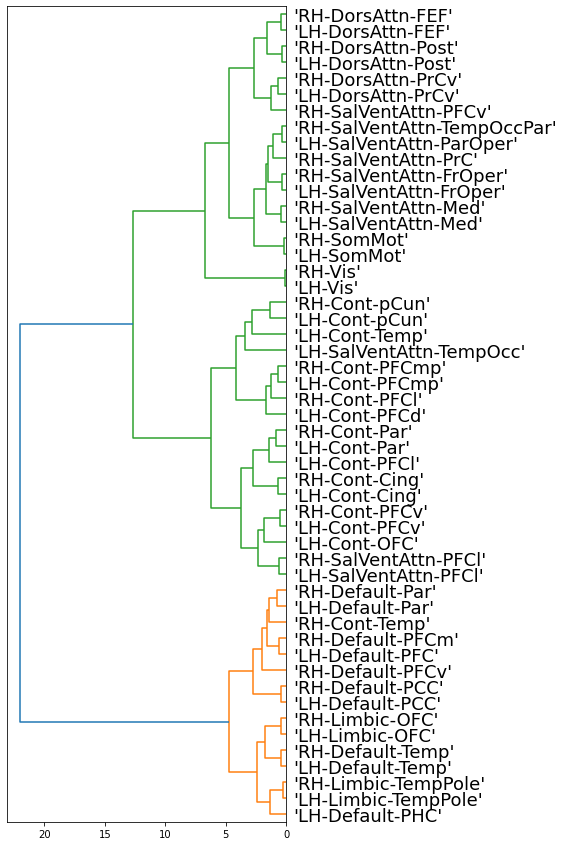

In [18]:
plt.figure(figsize=(5,15));
R = scipy.cluster.hierarchy.dendrogram(Z,p=100,orientation='left',labels=rnames);
ax = plt.gca();
plt.yticks(fontsize=18);

In [19]:
R.keys()

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list'])

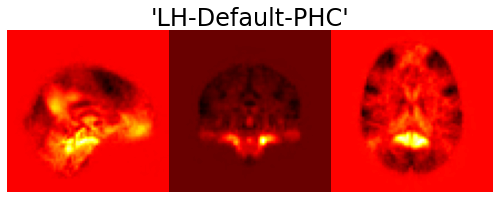

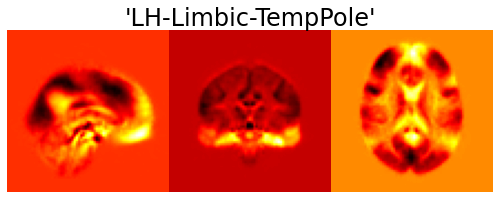

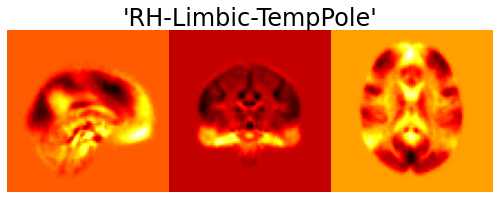

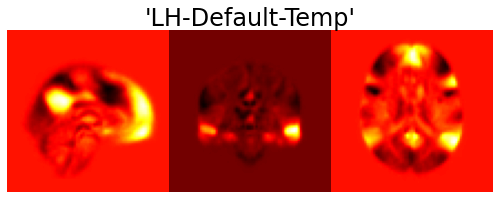

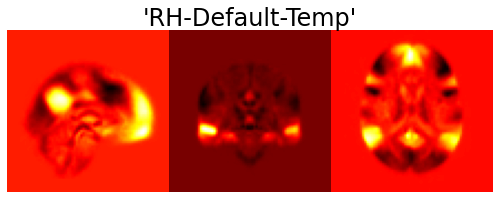

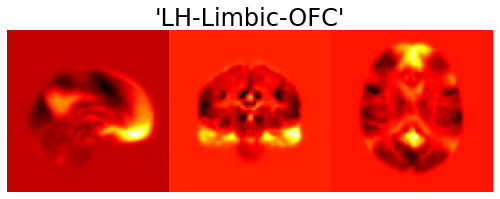

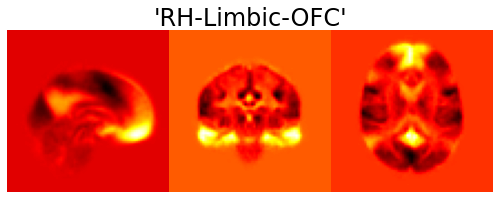

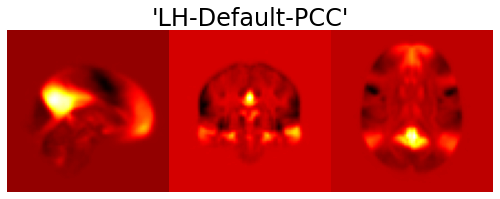

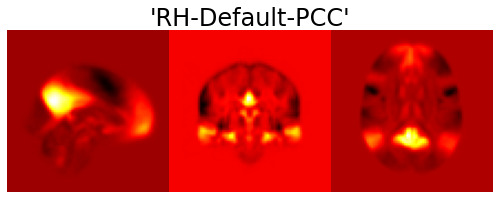

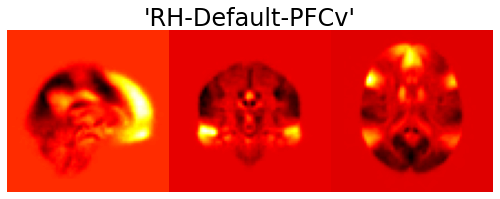

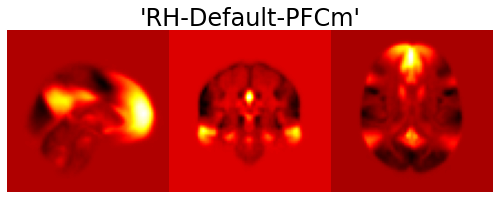

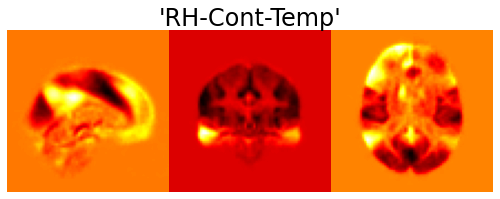

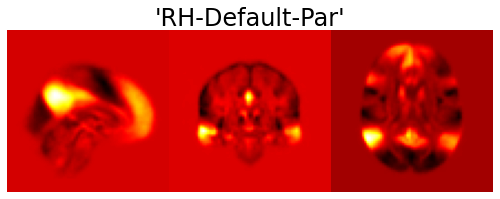

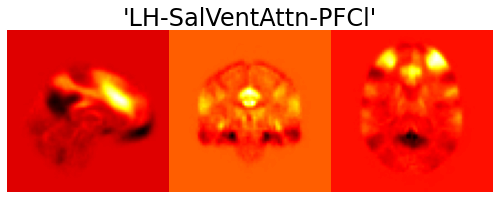

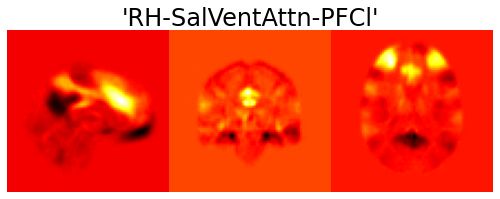

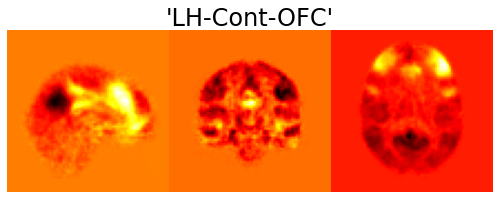

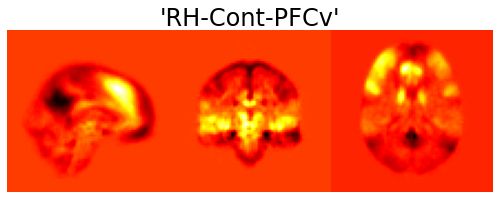

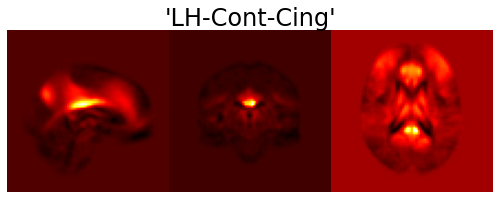

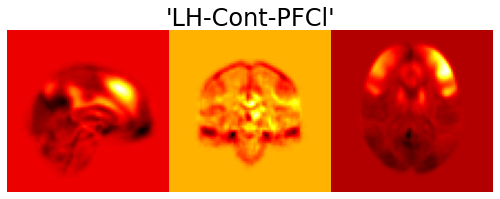

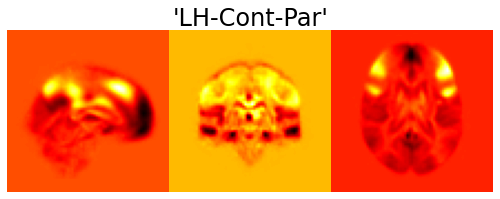

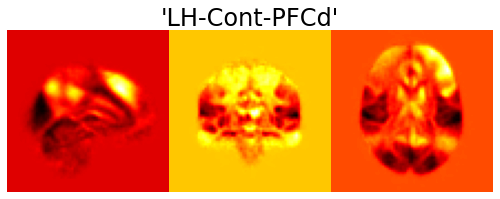

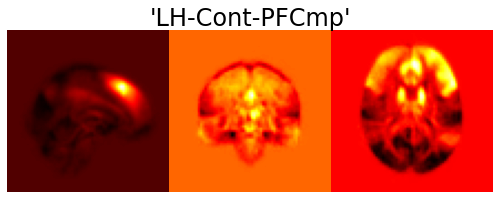

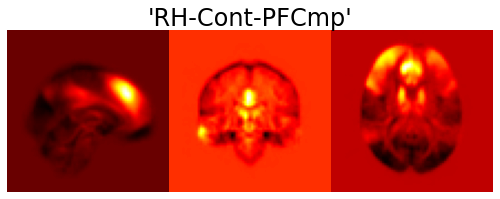

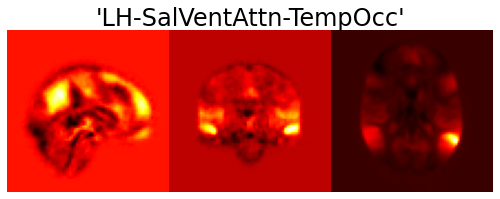

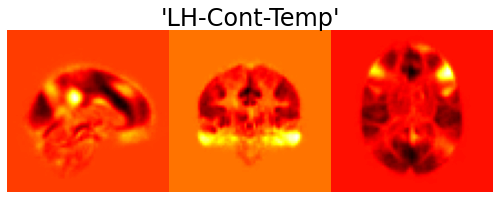

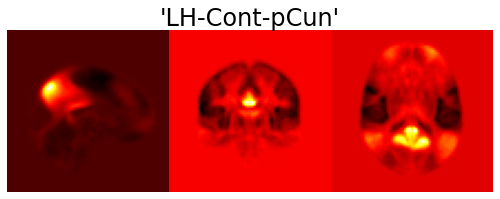

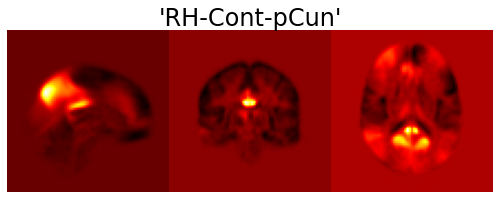

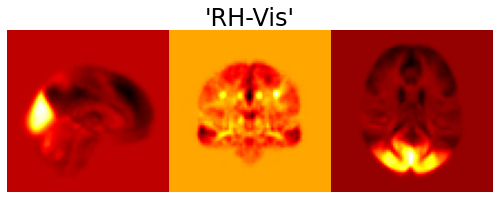

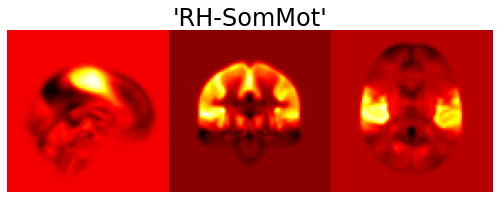

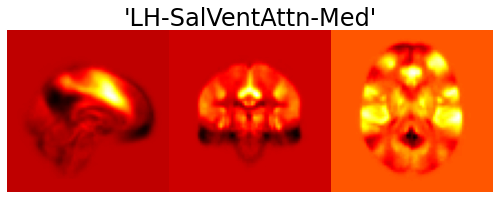

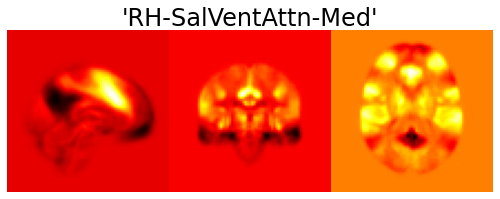

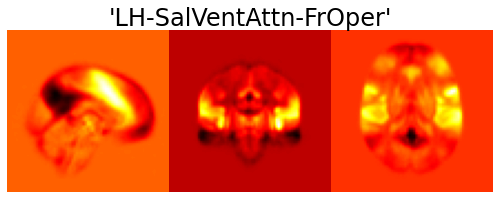

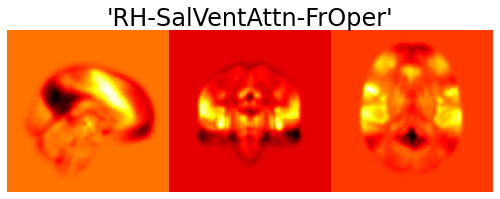

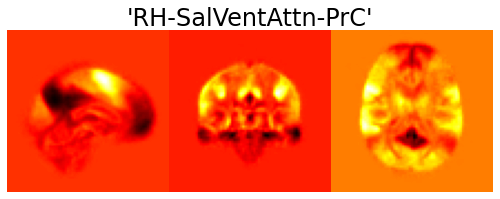

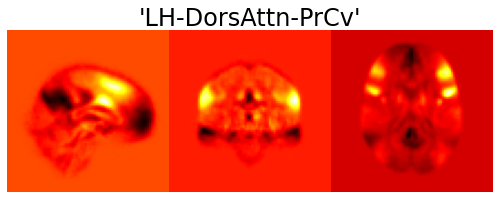

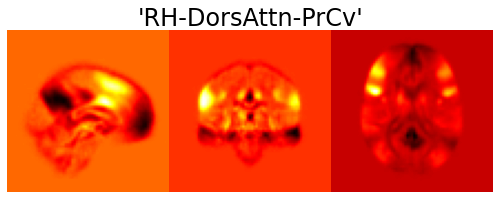

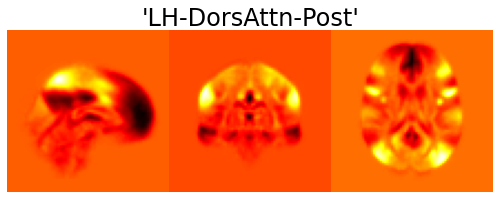

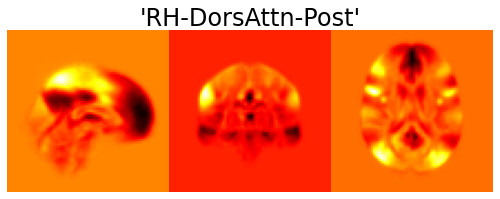

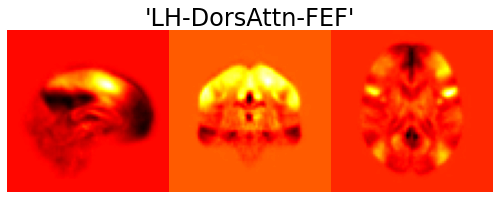

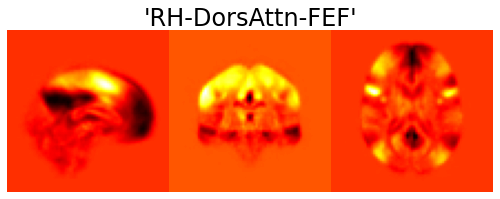

In [20]:
#rr = range(51)
#rr = np.argsort(im_avg.numpy().mean(axis=0).mean(axis=0).mean(axis=0))
rr = np.array(R['leaves'])
for r in rr:
    implot = ants.slice_image(im_avg,axis=3,idx=r)
    implot[np.isnan(implot.numpy())]=0
    implot.plot_ortho(overlay_alpha=.3,flat=True,cmap='hot',xyz_lines=False,orient_labels=False,title=rnames[r],overlay_cmap='gray')

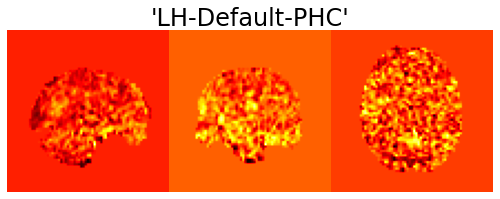

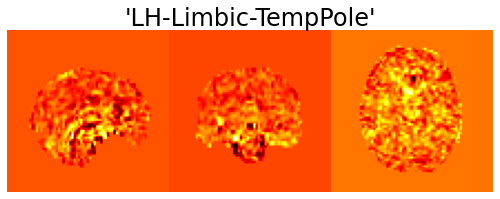

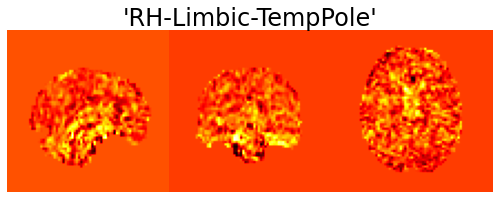

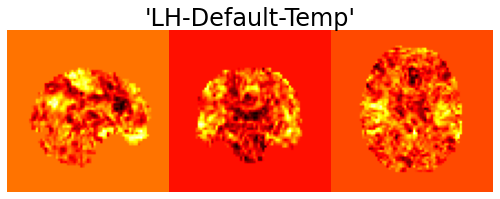

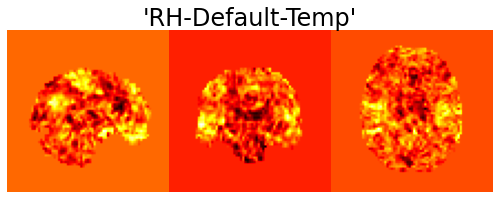

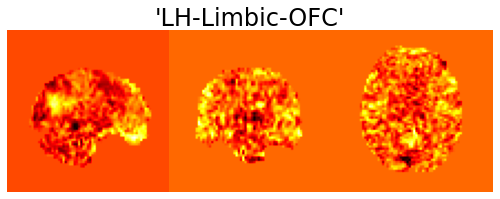

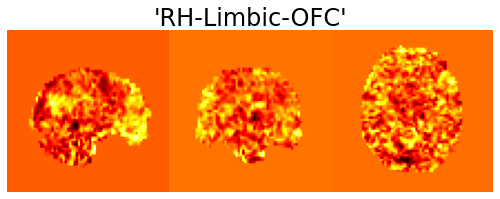

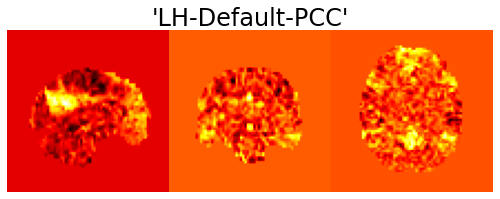

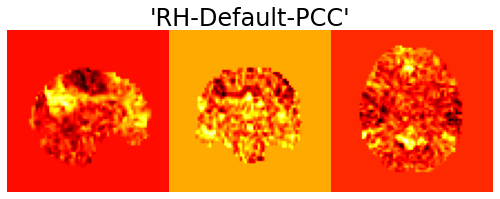

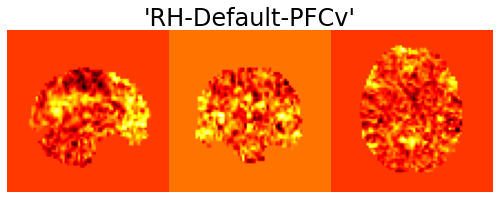

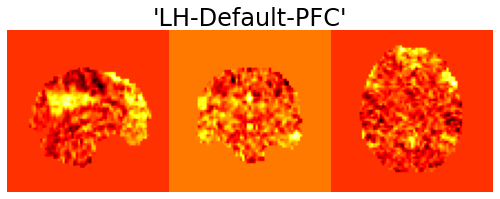

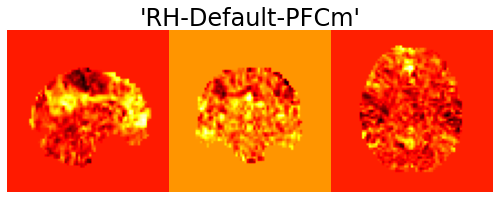

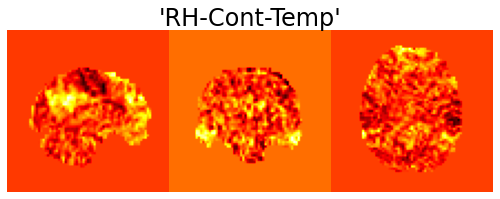

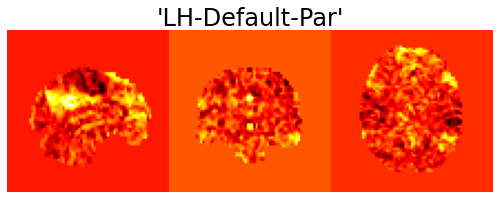

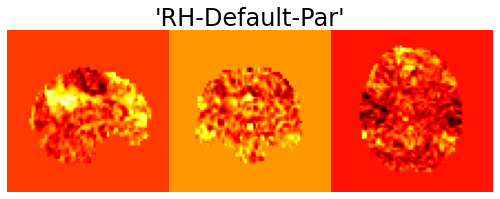

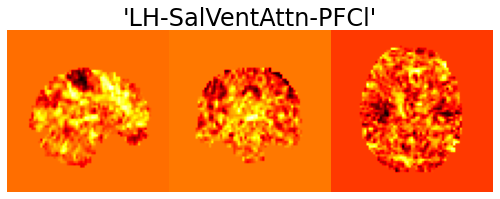

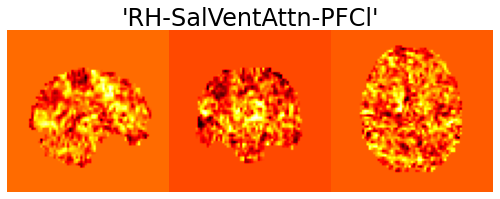

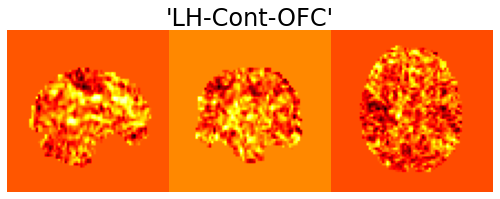

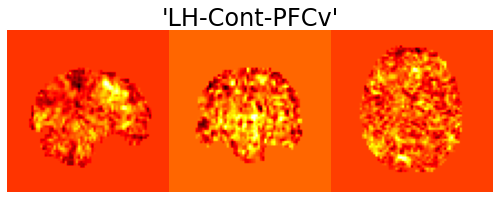

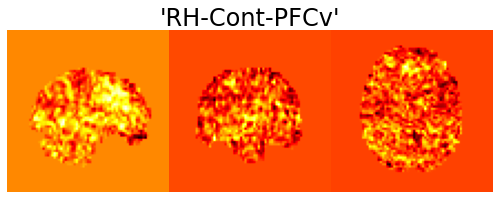

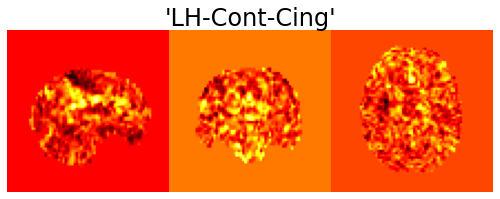

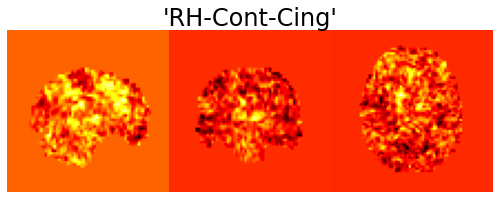

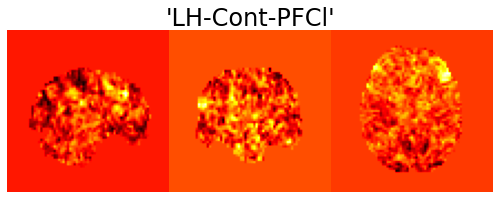

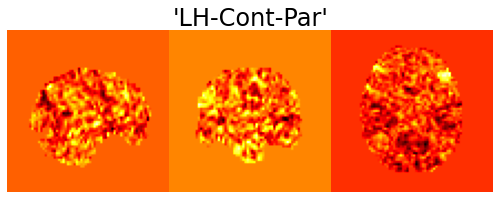

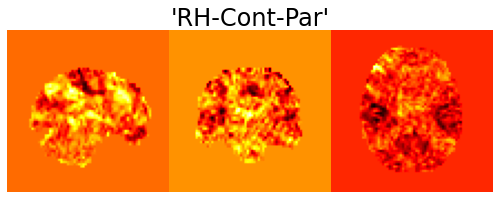

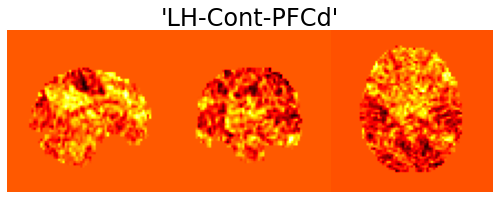

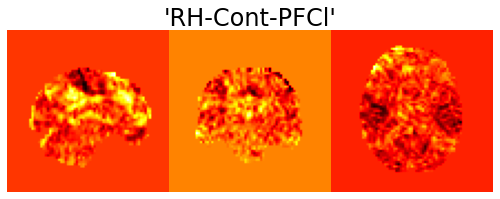

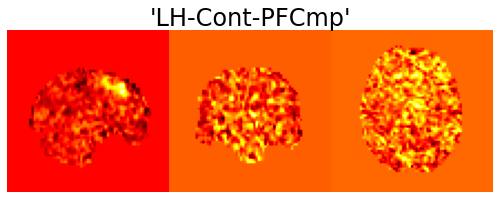

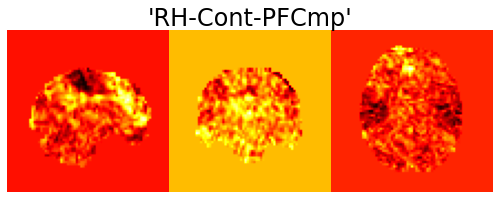

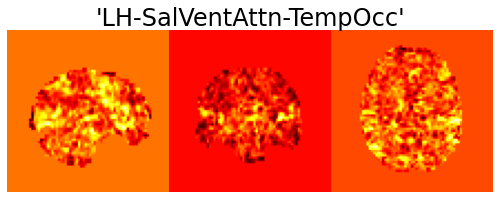

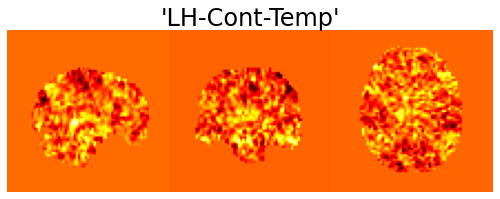

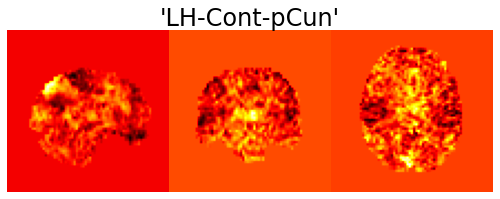

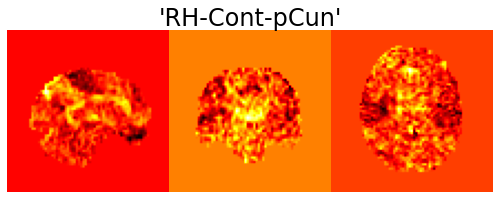

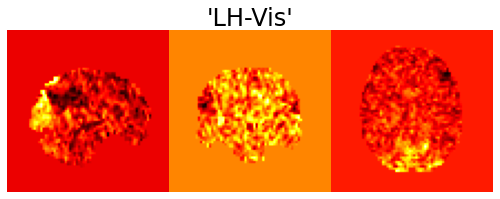

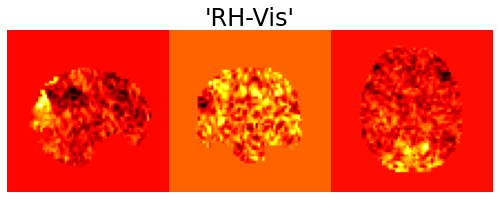

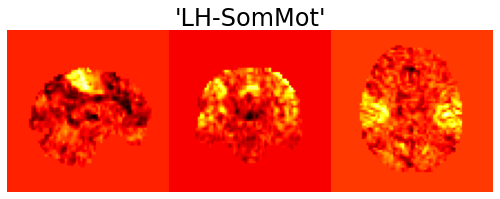

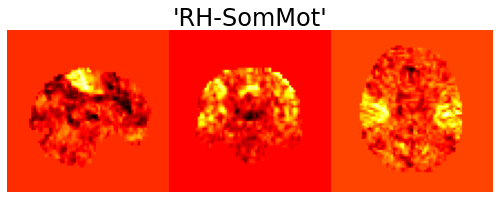

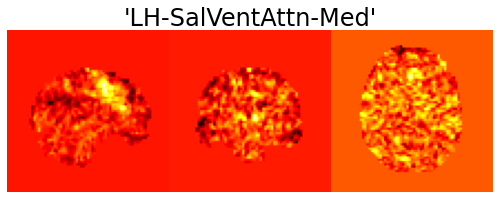

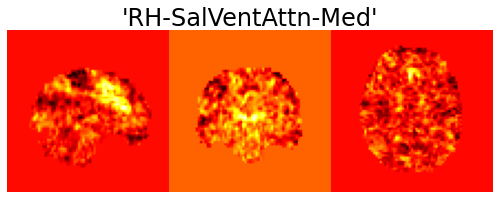

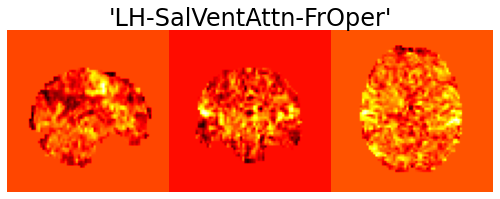

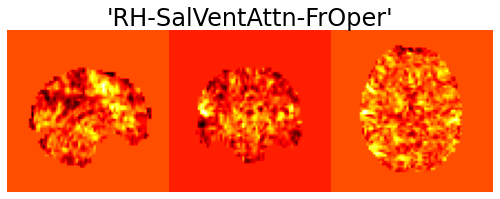

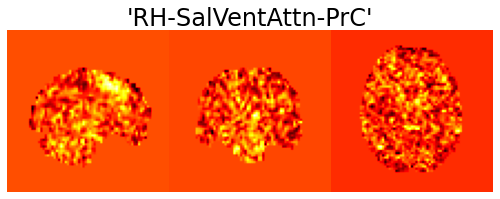

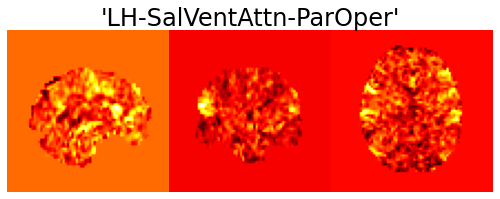

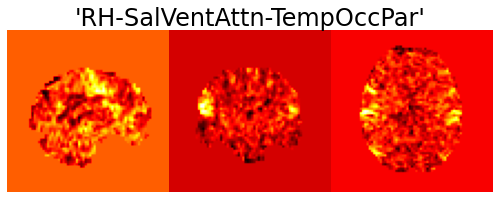

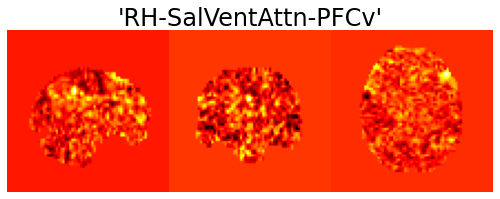

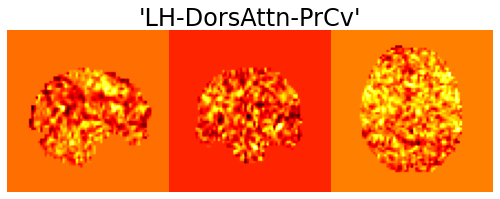

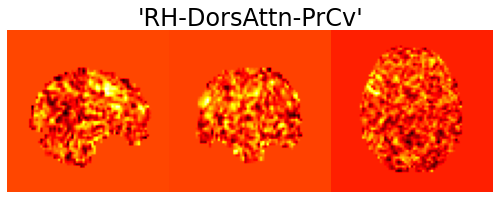

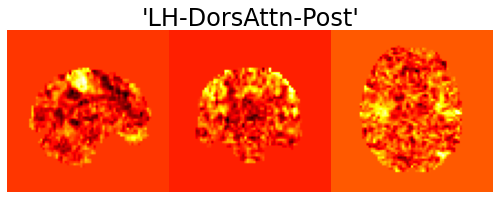

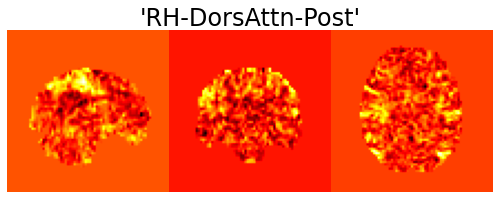

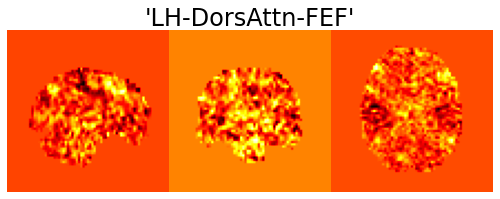

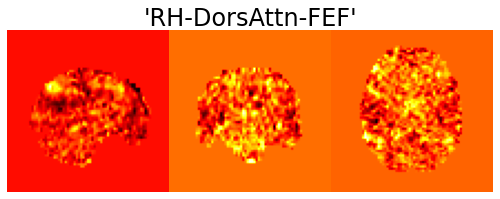

In [21]:
#rr = range(51)
#rr = np.argsort(im_avg.numpy().mean(axis=0).mean(axis=0).mean(axis=0))
rr = np.array(R['leaves'])
for r in rr:
    implot = ants.slice_image(im,axis=3,idx=r)
    implot[np.isnan(implot.numpy())]=0
    implot.plot_ortho(overlay_alpha=.3,flat=True,cmap='hot',xyz_lines=False,orient_labels=False,title=rnames[r],overlay_cmap='gray')